## SETUP

- imported pandas to read csv
- imports from sckit library: 
- train_test_split to divide our data into train and test
- OneHotEncoder 
- Standard Scalar to scale our data 


In [364]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  

## DATA INGESTION

In [365]:
df = pd.read_csv(r'data\clean\clean_credit_default.csv')

## 1st MODEL: LOGISTIC REGRESSION 

In [366]:
x1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_mean', 'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

- One hot encoding to change strings in data to numeric format

In [367]:
column_transformer1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

- Fitting the data on x

In [368]:
x1 = column_transformer1.fit_transform(x1)

- divided data for training and testing

In [369]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=50) 

- Performed feature scaling to normalize the range

In [370]:
st_x1= StandardScaler()    
x1_train= st_x1.fit_transform(x1_train)    
x1_test= st_x1.transform(x1_test)  

- fit train and test data to logistic regression model

In [371]:
logreg1 = LogisticRegression()
logreg1.fit(x1_train, y1_train)

LogisticRegression()

- predicting on test set

In [372]:
y1_pred= logreg1.predict(x1_test)  

- Checking accuracy

In [373]:
accuracy1 = logreg1.score(x1_test, y1_test)
print('Accuracy:', accuracy1)

Accuracy: 0.8050666666666667


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'confusion matrix')

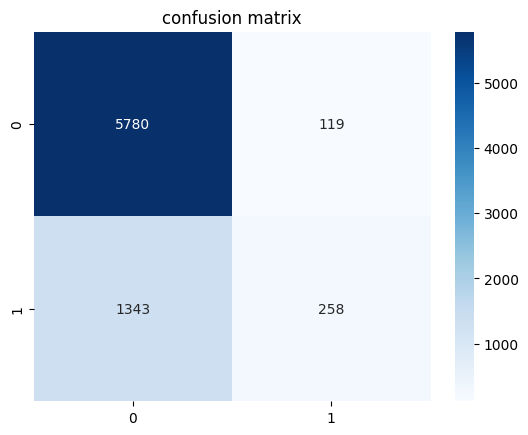

In [374]:
cm= confusion_matrix(y1_test, y1_pred) 

sns.heatmap(cm, annot=True, cmap = 'Blues', fmt='g')
plt.title("confusion matrix")

## 2nd MODEL: LOGISTIC REGRESSION 

- removing variables we found to be not as important during EDA and checking

In [375]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

- One hot encoding the data

In [376]:
column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

- Fitting the one hot encoded data on x

In [377]:
x2 = column_transformer2.fit_transform(x2)

- divided data for training and testing

In [378]:
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

- Performed feature scaling on the data to normalize the range 

In [379]:
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)  

- fit train and test data to logistic regression model

In [380]:
logreg1 = LogisticRegression()
logreg1.fit(x2_train, y2_train)

LogisticRegression()

- predicting on test set

In [381]:
y2_pred = logreg1.predict(x2_test)  

- Checking Accuracy

In [382]:
accuracy2 = logreg1.score(x2_test, y2_test)
print('Accuracy:', accuracy2)

Accuracy: 0.8065333333333333


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'Confusion matrix for new dataset')

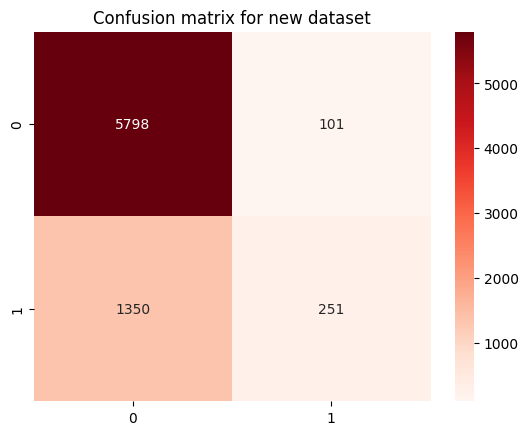

In [387]:
cm2 = confusion_matrix(y2_test, y2_pred)

sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')

plt.title("Confusion matrix for new dataset")

## 3rd MODEL: NAIVE BAYES CLASSIFIER

-Fit train and test data to naive bayes classification model

In [392]:
nbclass = GaussianNB()  
nbclass.fit(x2_train, y2_train)

GaussianNB()

- Predicting on test set

In [393]:
y3_pred = nbclass.predict(x2_test)

- Checking accuracy 

In [394]:
accuracy3 = nbclass.score(x2_test, y2_test)
print("Accuracy", accuracy3)

Accuracy 0.7992


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'Confusion Matric for naive bayes')

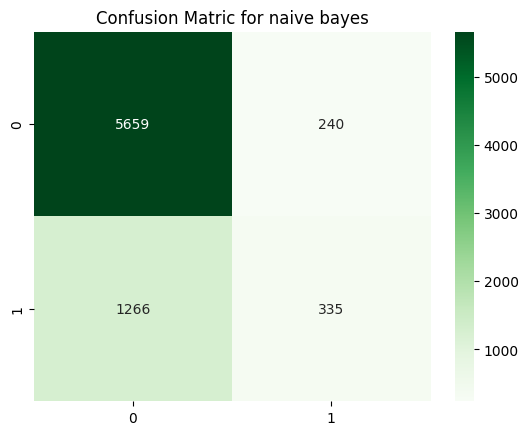

In [395]:
cm3 = confusion_matrix(y2_test, y3_pred)

sns.heatmap(cm3, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matric for naive bayes")